# data import

In [33]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임으로 데이터를 적재합니다.
train = pd.read_csv('./data/train.csv')

# 처음 다섯 개의 행을 출력합니다.
train.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [34]:
# 데이터프레임 요약 정보
train_info = train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [35]:
# 상위 샘플
train_head = train.head()
train_head

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# data 전처리

In [36]:
# 결측치 확인
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. 불필요한 컬럼 제거
df = train.drop(columns=["id", "CustomerId"])

# 2. Gender 인코딩
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

# 3. Geography 원-핫 인코딩
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

# 4. Surname frequency encoding 적용
surname_counts = df["Surname"].value_counts()
df["Surname_freq"] = df["Surname"].map(surname_counts)

# Surname 제거
df.drop(columns=["Surname"], inplace=True)

# 5. 연속형 컬럼 정규화
# scale_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
# scaler = StandardScaler()
# df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 6. 입력/출력 분리
X = df.drop(columns=["Exited"])
y = df["Exited"]

# 결과 확인
X.head(10)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Surname_freq
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,False,False,261
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,False,False,300
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,False,False,1306
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,False,False,1577
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,False,True,246
5,588,1,36.0,4,131778.58,1,1.0,0.0,136024.31,True,False,962
6,593,0,30.0,8,144772.69,1,1.0,0.0,29792.11,False,False,1229
7,678,1,37.0,1,138476.41,1,1.0,0.0,106851.60,False,True,208
8,676,1,43.0,4,0.00,2,1.0,0.0,142917.13,False,False,1024
9,583,1,40.0,4,81274.33,1,1.0,1.0,170843.07,True,False,335


`Geography 속성 전처리`의 경우, 모델은 문자열을 학습하지 못하므로 모델이 학습가능한 데이터로 가공이 필요합니다. 따라서 one-hot인코딩을 통해 모델이 학습가능한 데이터로 전처리하였습니다. 

이때 다중공선성(multicollinearity)을 피하기 위해 3개 범주 → 3개 더미 변수를 그대로 쓰면, 모델이 수학적으로 쓸데없는 중복 정보를 학습하게 됩니다. drop_first=True를 이용하여 3개의 범주이지만 0과 1을 통해 구별이 가능하도록 표현할 수 있습니다.
(예: Germany = 1이면 France, Spain은 무조건 0임 → 선형 회귀에서는 문제 됨)

| 고객의 원래 지역 | Geography\_Germany | Geography\_Spain |
| --------- | ------------------ | ---------------- |
| France    | 0                  | 0                |
| Germany   | 1                  | 0                |
| Spain     | 0                  | 1                |


In [48]:

# Surname 빈도기반 인코딩 결과 확인
df[["Surname_freq"]].describe()

,Surname_freq
count,165034.000000
mean,533.522620
std,540.040407
min,1.000000
25%,108.000000
50%,362.000000
75%,754.000000
max,2456.000000


`Surname속성 전처리` 의 경우, 같은 성을 가진 가족단위의 가입자가 이탈률에 끼칠 영향을 고려하여 빈도기반의 인코딩을 진행하였습니다.

- 예시 : 미성년자의 가입자의 경우, 부모님과 같은 은행에서 가입을 하는 경우가 존재할 수 있음

In [49]:
train.head() # 훈련데이터 원본

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [50]:
df.head() # 전처리한 데이터

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Surname_freq
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,261
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,300
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,1306
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,1577
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,246


# EDA

In [63]:
eda_df = df.copy()

/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3378640256.py:10: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3378640256.py:10: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3378640256.py:10: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3378640256.py:10: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3378640256.py:10: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_8

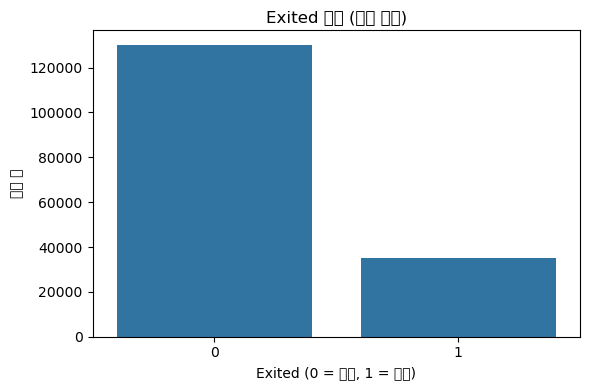

In [64]:
# eda_df를 사용하여 Exited 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x="Exited", data=eda_df)
plt.title("Exited 분포 (이탈 여부)")
plt.xlabel("Exited (0 = 유지, 1 = 이탈)")
plt.ylabel("고객 수")
plt.tight_layout()
plt.show()


### 1. Exited 분포 시각화 결과
고객 이탈 여부(Exited)에 대한 데이터가 class imbalance한 것이 확인된다. 

Exited = 0 (잔류 고객): 약 130,000명 이상,
Exited = 1 (이탈 고객): 약 35,000명 수준

즉, 전체의 약 80%가 유지, 20%가 이탈한다. 

따라서 해당 분류 모델은 정확도(Accuracy)만으로는 성능을 판단하기 어려울 수 있다.
(모델 평가 시 반드시 정확도 외에 F1-score, Recall, AUC 등을 함께 고려해야 함)

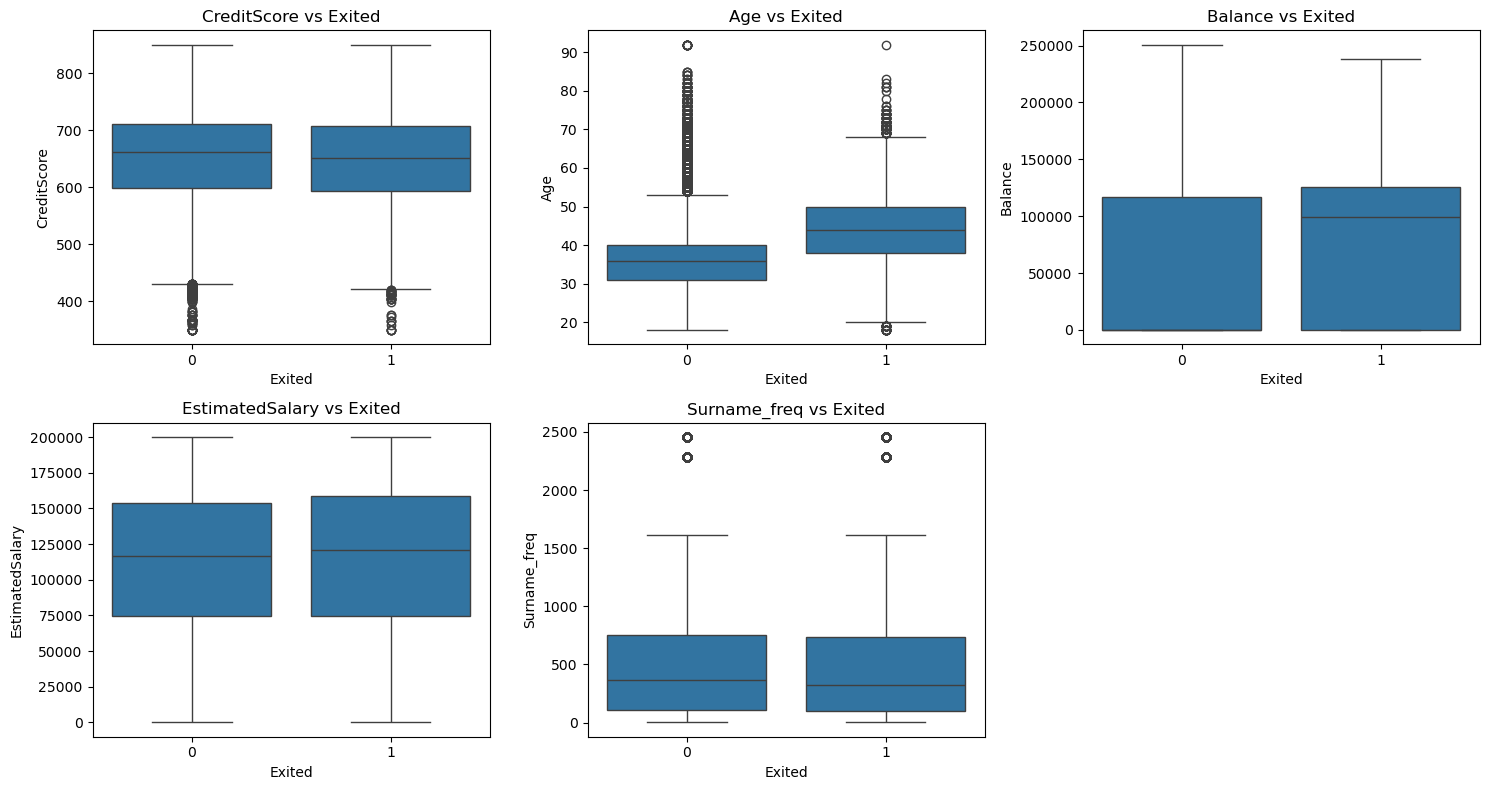

In [65]:
# 수치형 피처 (정규화된 값 기반) - Boxplot
num_features = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Surname_freq"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(num_features):
    sns.boxplot(x="Exited", y=feature, data=eda_df, ax=axes[idx])
    axes[idx].set_title(f"{feature} vs Exited")
    axes[idx].set_xlabel("Exited")
    axes[idx].set_ylabel(feature)

# 마지막 subplot 비우기
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


위 그래프는 정규화된 수치형 변수 5개(CreditScore, Age, Balance, EstimatedSalary, Surname_freq)에 대해
이탈 여부(Exited)에 따른 분포 차이를 boxplot로 보인 것입니다.

| 변수                | 분포 차이           | 해석           |
| ----------------- | --------------- | ------------ |
| `CreditScore`     | 거의 없음           | 예측력 낮음       |
| `Age`             | 나이가 많은 수록 이탈 고객 증가  |  강한 영향     |
| `Balance`         | 잔고가 높을 수록 이탈 고객 증가    | 의미 있는 차이     |
| `EstimatedSalary` | 차이 거의 없음        | 영향 낮음        |
| `Surname_freq`    | 낮은 빈도일수록 이탈률 높음 |  중요 피처 가능성 |


/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/309981246.py:19: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/309981246.py:19: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/309981246.py:19: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/309981246.py:19: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/309981246.py:19: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylab

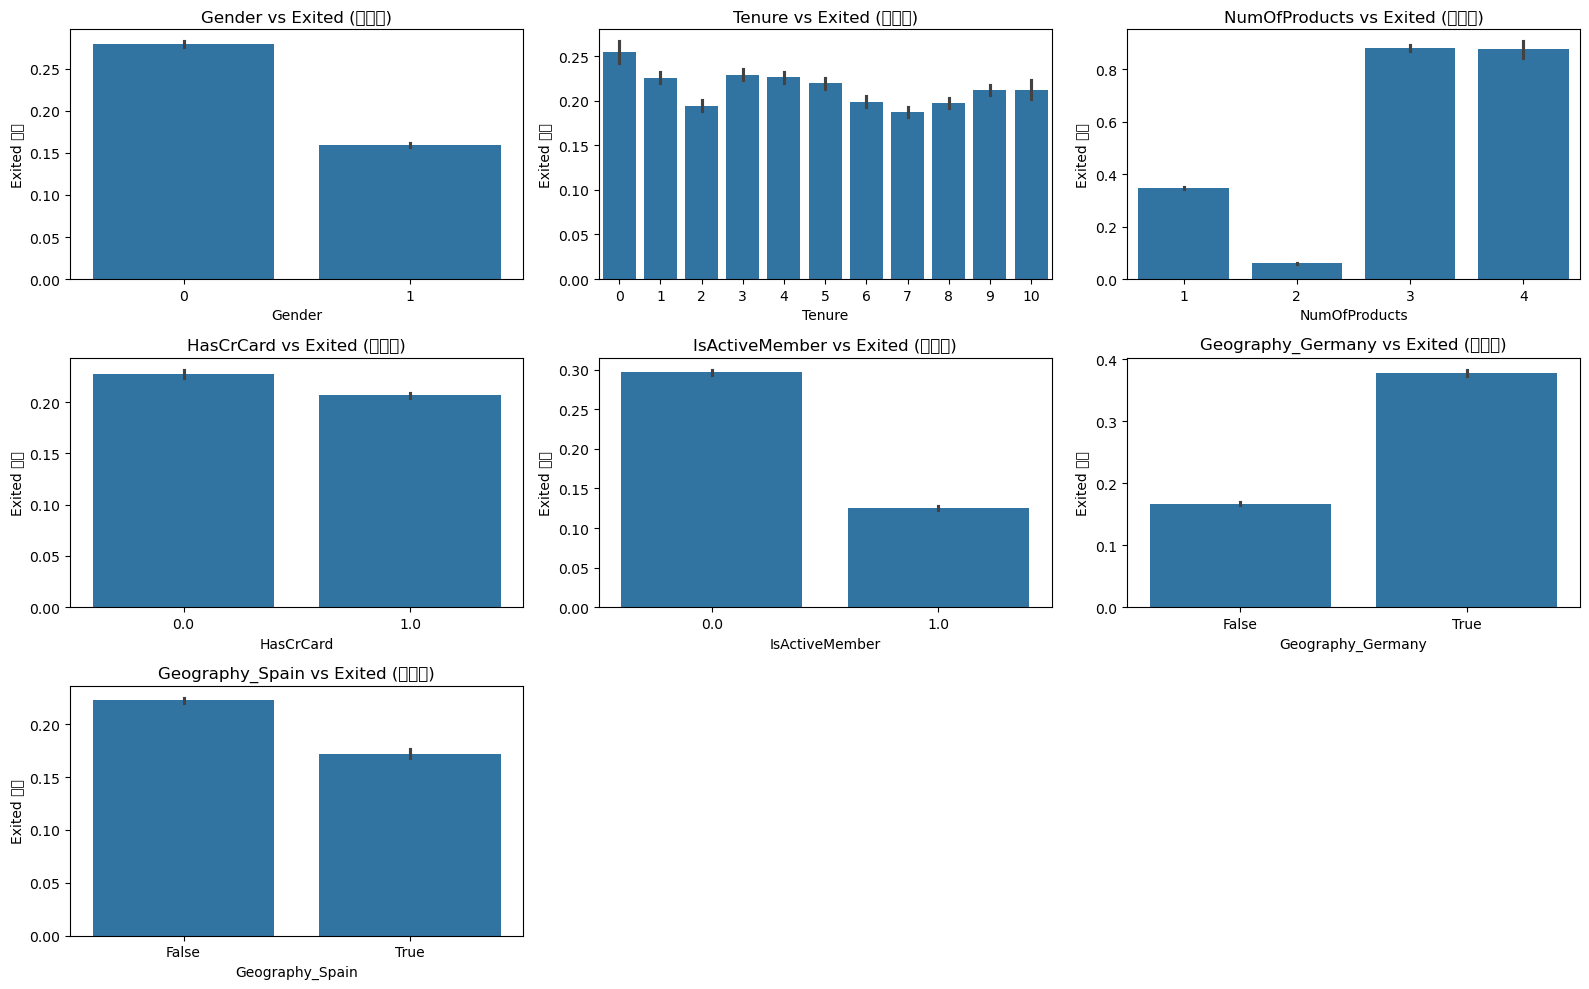

In [66]:
# 이산형/범주형 변수 목록
cat_features = [
    "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember",
    "Geography_Germany", "Geography_Spain"
]

fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(cat_features):
    sns.barplot(x=feature, y="Exited", data=eda_df, ax=axes[idx])
    axes[idx].set_title(f"{feature} vs Exited (이탈률)")
    axes[idx].set_ylabel("Exited 비율")

# 남는 subplot 제거
for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


위 그래프는 이산형 및 범주형 변수 7개("Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember",
    "Geography_Germany", "Geography_Spain")에 대해 이탈 여부(Exited)에 따른 분포 차이를 barplot로 보인 것입니다.

| 변수                     | 이탈률 패턴                        | 해석           |
| ---------------------- | ----------------------------- | ------------ |
| **Gender**             | 여성 고객의 이탈률이 약간 더 높음           | 약한 차이        |
| **Tenure**             | 특정 구간(2, 3, 8년 등)에서 이탈률 차이 있음 | 경향 불분명       |
| **NumOfProducts**      | 1개 또는 4개 보유 시 이탈률 ↑, 2개는 낮음   |  유의미한 피처   |
| **HasCrCard**          | 신용카드 보유 여부는 거의 차이 없음          | 영향 낮음        |
| **IsActiveMember**     | 비활성 회원은 이탈률 확연히 높음            |  강력한 예측 변수 |
| **Geography\_Germany** | 독일 고객의 이탈률 높음                 | 지역 기반 패턴 존재  |
| **Geography\_Spain**   | 스페인 고객은 이탈률 낮음                | 안정적 고객군 가능성  |


 

Boxplot과 Barplot

| 구분       | **Boxplot**                    | **Barplot**                             |
| -------- | ------------------------------ | --------------------------------------- |
| **대상**   | 연속형 수치 데이터                     | 범주형(또는 이산형) 데이터                         |
| **Y축 값** | 값의 **분포(중앙값, 사분위수, 이상치)**      | 그룹별 **평균값** (보통 타겟 비율 등)                |
| **용도**   | 특정 수치형 피처의 분포를 Exited=0/1별로 비교 | 각 그룹(범주)마다 이탈률(Exited=1 비율)을 비교         |
| **예시**   | `Balance`, `Age`               | `Gender`, `Geography`, `IsActiveMember` |


### 2.EDA 수행 결과

Data type 분류
- 연속형(수치형) → Age, Balance, EstimatedSalary, CreditScore, Surname_freq
- 범주형/이산형 → Gender, NumOfProducts, HasCrCard, IsActiveMember, Geography_*, Tenure

`[EDA를 통한 타겟(Exited)에 영향이 강한 속성 유추]` 
1. 주요 영향 속성 및 근거

| 변수명                 | 영향 수준 | EDA 근거                                              |
| ------------------- | ----- | --------------------------------------------------- |
| `Age`               | 매우 강함 | Exited=1 고객이 평균적으로 더 나이가 많았음 *(boxplot에서 분포 차이 뚜렷)* |
| `IsActiveMember`    | 매우 강함 | 비활성 고객의 이탈률이 현저히 높음 *(barplot에서 큰 차이)*              |
| `NumOfProducts`     | 강함    | 상품 개수 2개 고객의 이탈률이 가장 낮음, 1개/4개일 때 이탈률 상승 *(U자형 패턴)* |
| `Geography_Germany` | 강함    | 독일 고객이 다른 국가 대비 이탈률이 높게 나타남 *(barplot 기준)*          |
| `Surname_freq`      | 강함    | 빈도 낮은 성씨(희귀한 성)의 이탈률이 높음 *(사회적 연결성 낮은 그룹일 가능성)*     |
| `Balance`           | 보통    | 이탈 고객의 평균 잔고가 더 높음 *(boxplot 기준 경향 존재)*             |

2. 영향이 낮았던 변수

| 변수                               | 관찰                           |
| -------------------------------- | ---------------------------- |
| `CreditScore`, `EstimatedSalary` | Exited 간 분포 차이 거의 없음 → 영향 낮음 |
| `HasCrCard`                      | 신용카드 보유 여부에 따른 이탈률 차이 미미     |


EDA를 통해 나이(Age), 활동성(IsActiveMember), 상품 수(NumOfProducts), 지역(Geography_Germany), 성씨 빈도(Surname_freq)가 Exited에 주요한 영향을 미칠 수 있다는 것을 확인할 수 있습니다.


In [67]:
# 전체 피처를 대상으로 상관관계 행렬 계산 및 히트맵 시각화
full_corr_matrix = eda_df.corr(numeric_only=True)

# Exited 기준 전체 피처와의 상관계수를 소수점 4자리까지 출력 및 정렬
target_corr_precise = full_corr_matrix["Exited"].drop("Exited").sort_values(key=abs, ascending=False).round(4)
target_corr_precise

# # 히트맵 그리기
# plt.figure(figsize=(12, 10))
# sns.heatmap(full_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
# plt.title("전체 피처 간 상관관계 히트맵")
# plt.tight_layout()
# plt.show()

# # Exited 기준 상관관계만 추출해서 정리
# target_corr_all = full_corr_matrix["Exited"].drop("Exited").sort_values(key=abs, ascending=False)
# target_corr_all


Age                  0.3408
NumOfProducts       -0.2146
Geography_Germany    0.2111
IsActiveMember      -0.2102
Gender              -0.1464
Balance              0.1297
Geography_Spain     -0.0512
CreditScore         -0.0274
HasCrCard           -0.0221
Surname_freq        -0.0218
Tenure              -0.0196
EstimatedSalary      0.0188
Name: Exited, dtype: float64

/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3371434559.py:8: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3371434559.py:8: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3371434559.py:8: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3371434559.py:8: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/3371434559.py:8: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_835

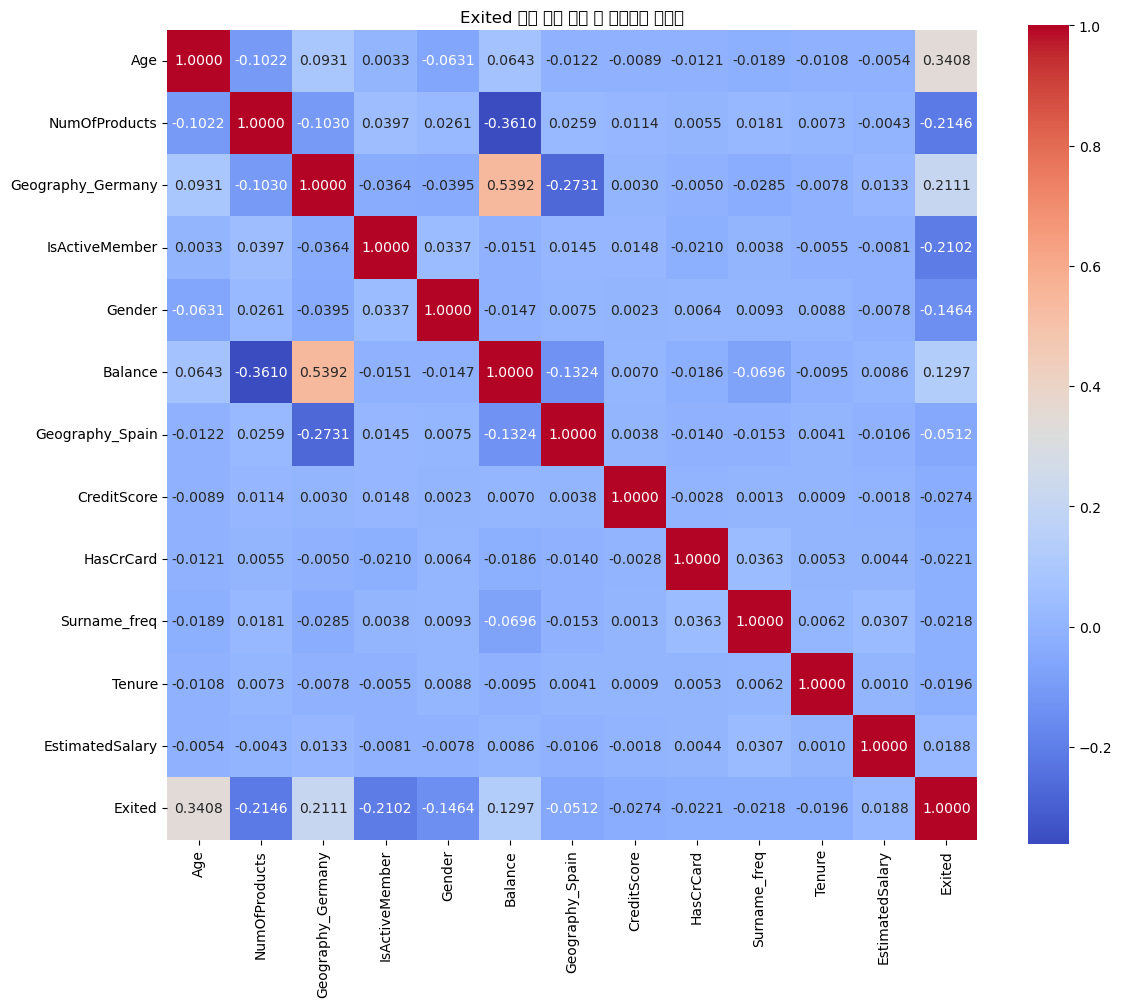

In [68]:
# Exited 기준 상관관계만 추출해서 정렬
top_corr_matrix_all = eda_df[target_corr_precise.index.tolist() + ["Exited"]].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix_all, annot=True, cmap="coolwarm", fmt=".4f", square=True)
plt.title("Exited 기준 전체 피처 간 상관관계 히트맵")
plt.tight_layout()
plt.show()


위 히트맵 시각화는 Exited를 포함한 전체 주요 피처들 간의 상관관계(소수점 4자리)를 색상으로 표현한 것입니다.

`히트맵 시각화 분석`

- 히트맵에서 진한 붉은색/푸른색은 강한 상관관계를 의미
- Exited 행/열을 따라 보면 Age, NumOfProducts, IsActiveMember 등이 가장 뚜렷한 색 대비를 가짐

/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/1591694089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/1591694089.py:12: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/1591694089.py:12: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/1591694089.py:12: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j8/y72st7p512s2c9b0ttpdrpv40000gn/T/ipykernel_83597/1591694089.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(

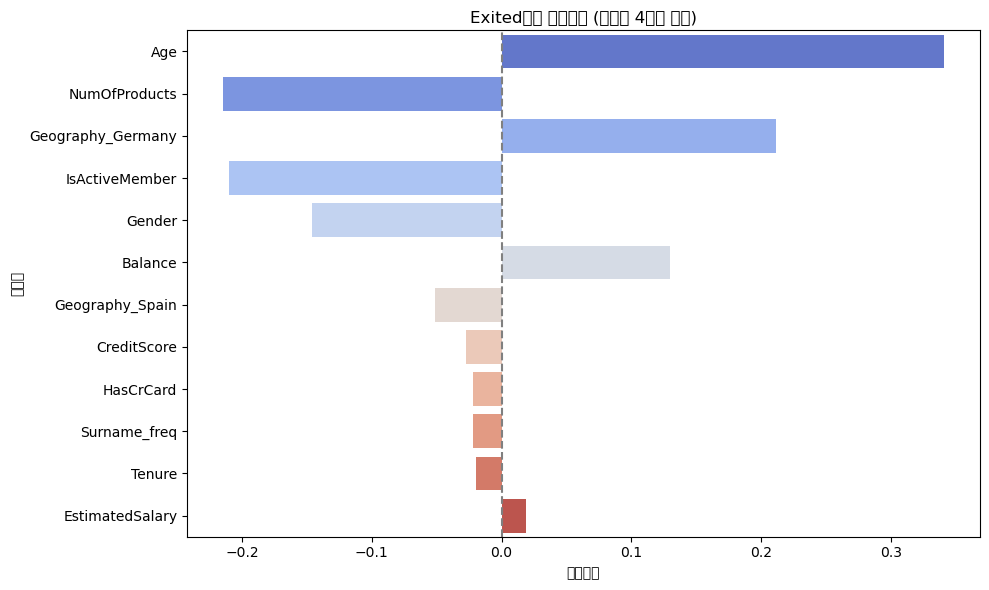

In [69]:
# 상관계수를 막대그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    y=target_corr_precise.index,
    x=target_corr_precise.values,
    palette="coolwarm"
)
plt.title("Exited와의 상관계수 (소수점 4자리 기준)")
plt.xlabel("상관계수")
plt.ylabel("피처명")
plt.axvline(0, color="gray", linestyle="--")  # 기준선
plt.tight_layout()
plt.show()


위 막대그래프는 Exited와 전체 피처 간 상관계수(소수점 4자리 기준)를 시각화한 것입니다.

`막대그래프 시각화 해석`
- 오른쪽(+): Age, Balance, Geography_Germany 등은 상관계수가 양수 → 값이 클수록 이탈 가능성 증가
- 왼쪽(–): NumOfProducts, IsActiveMember 등은 음의 상관관계 → 값이 작을수록 이탈 가능성 증가

| 변수명                 | 영향 방향 | 설명                 |
| ------------------- | ----- | ------------------ |
| `Age`               | ▲ 증가  | 나이 많을수록 이탈률 ↑      |
| `NumOfProducts`     | ▼ 감소  | 상품 2개 보유 고객은 이탈률 ↓ |
| `Geography_Germany` | ▲ 증가  | 독일 고객 이탈률 ↑        |
| `IsActiveMember`    | ▼ 감소  | 활동성 높은 고객 이탈률 ↓    |


### 3. EDA 기반 상관관계 유추(Correlation Interface) 결과
위 상관관계 히트맵과 상관계수 막대그래프는 Exited와 다른 피처들 간의 선형 상관관계를 시각적으로 보여줍니다.

(숫자가 ±1에 가까울수록 더 강한 관계를 의미)

| 순위 | 변수명                 | 상관계수        | 해석                   |
| -- | ------------------- | ----------- | -------------------- |
| ①  | `Age`               | **+0.3408** | 나이가 많을수록 이탈 가능성 ↑ |
| ②  | `NumOfProducts`     | **–0.2146** | 상품 2개 고객은 안정적     |
| ③  | `Geography_Germany` | **+0.2111** | 독일 고객 이탈률 ↑          |
| ④  | `IsActiveMember`    | **–0.2102** | 활동 고객 이탈률 ↓       |
| ⑤  | `Gender`            | **–0.1464** | 여성 고객 이탈률 약간 ↑       |
| ⑥  | `Balance`           | **+0.1297** | 잔고 높을수록 다소 ↑         |
| ⑦  | `Geography_Spain`   | **–0.0512** | 스페인 고객 안정적           |
| ⑧  | `CreditScore`       | **–0.0274** | 거의 무관                |
| ⑨  | `HasCrCard`         | **–0.0221** | 무관                   |
| ⑩  | `Surname_freq`      | **–0.0218** | 미미한 음의 상관관계          |
| ⑪  | `Tenure`            | **–0.0196** | 무관                   |
| ⑫  | `EstimatedSalary`   | **+0.0188** | 무관                   |


따라서 Exited(이탈률)과 가장 관계있는 속성은 **Age** > **NumOfProducts** > **Geography_Germany** > **IsActiveMember** 이다.